In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (80,20)
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from bfseg.utils.image_enhancement import *

from os import listdir
import os
from os.path import isfile, join


In [3]:
## Main Program

cam = "rgb_2"

working_dir = "/home/rene/vicon_dataset/"+cam+"/"
output_dir = "/home/rene/vicon_dataset/rotated"

# Copy all images int this list
image_folders = [f for f in listdir(working_dir)  if ".txt" not in f]

# Sort by timestamp as they will be remapped to img_001, img_002,...
image_folders = sorted(image_folders, key=float, reverse = False)

# Projected pointcloud 
files_labels = [ f + "/labels.png" for f in image_folders]
# Projected pointcloud on top of original image
files_preview = [ f + "/preview.png" for f in image_folders]
# Distance from camera for each projected pointcloud. 
files_distance = [f + "/distance.png" for f in image_folders]
# original input image
files_original = [f + "/original.png" for f in image_folders]


In [7]:
dist_img = Image.open(working_dir + "/"+ files_distance[i])

In [14]:
# dist1 = (dist / (lidar) ) * 254) + 1 -> 
# dist = (dist1 - 1) *(lidar) / 254

SyntaxError: invalid syntax (<ipython-input-14-9d046b4402b7>, line 1)

In [23]:
10/254

0.03937007874015748

In [24]:
1/25.4

0.03937007874015748

In [8]:
np.unique(np.asarray(dist_img))

array([  0,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168], dtype=uint8)

In [19]:
depths =  ((np.asarray(dist_img).astype(float) - 1) * 10 / 254)

In [22]:
np.unqiue(depths)

AttributeError: module 'numpy' has no attribute 'unqiue'

In [20]:
np.std(depths)

1.6402973887946302

In [21]:
np.mean(depths)

1.9720948837560615

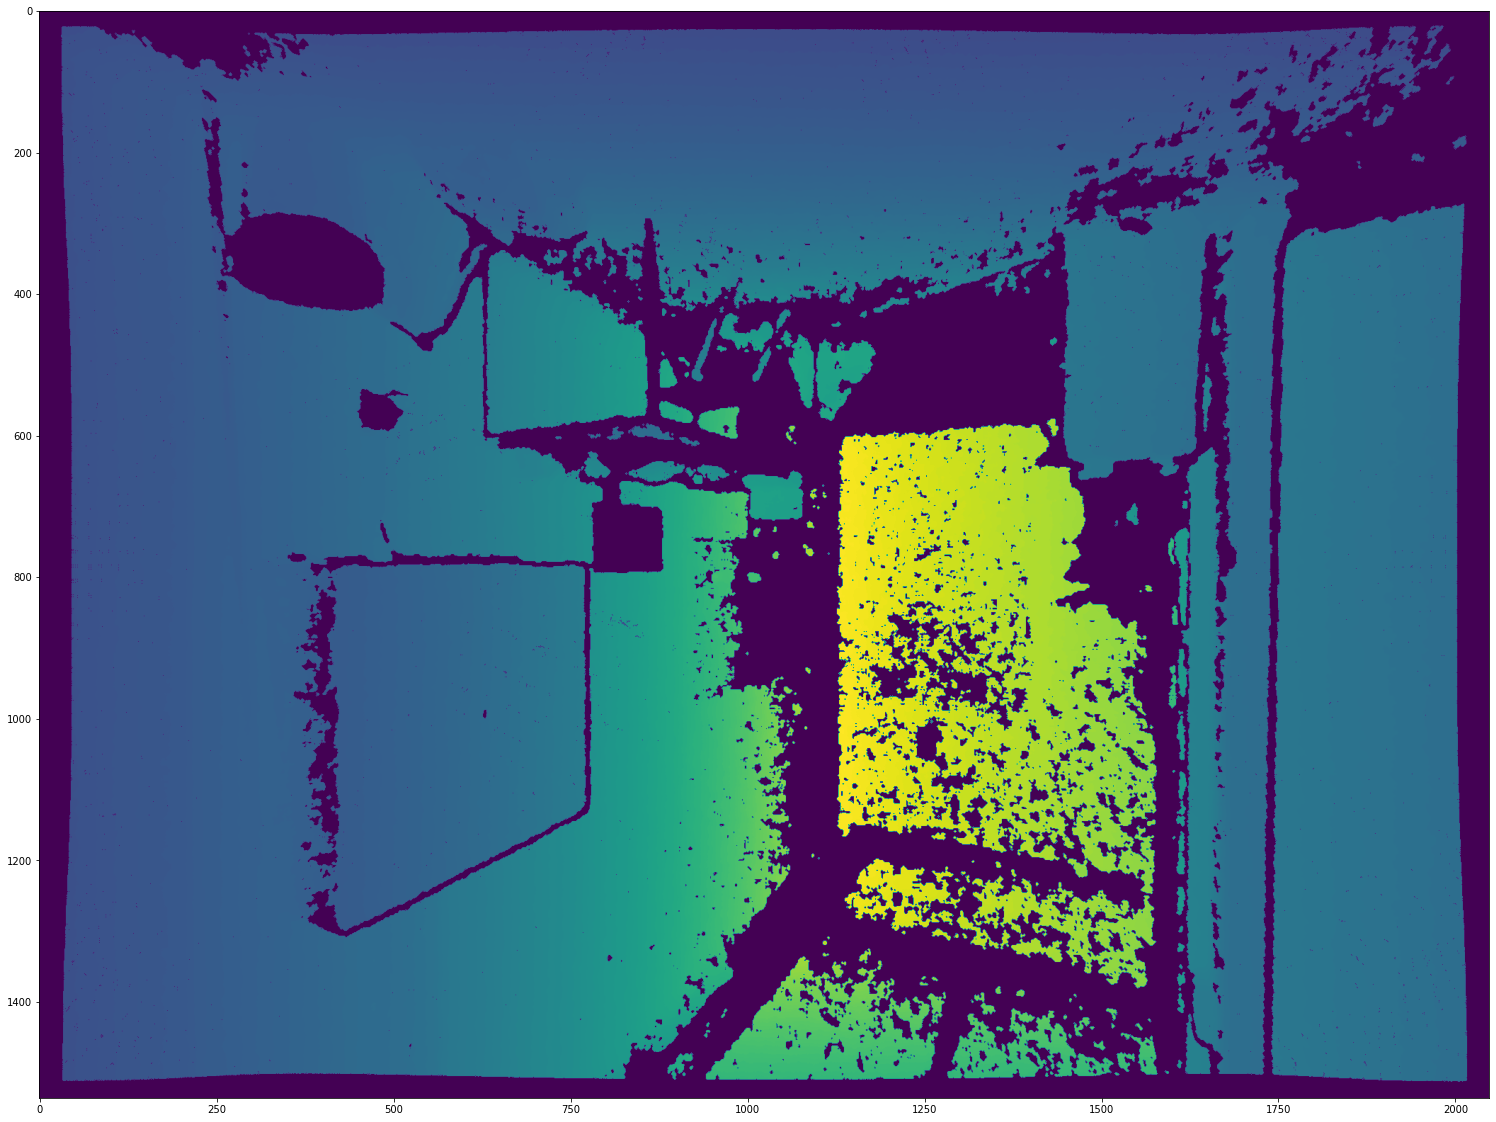

In [13]:
plt.imshow(np.asarray(dist_img))

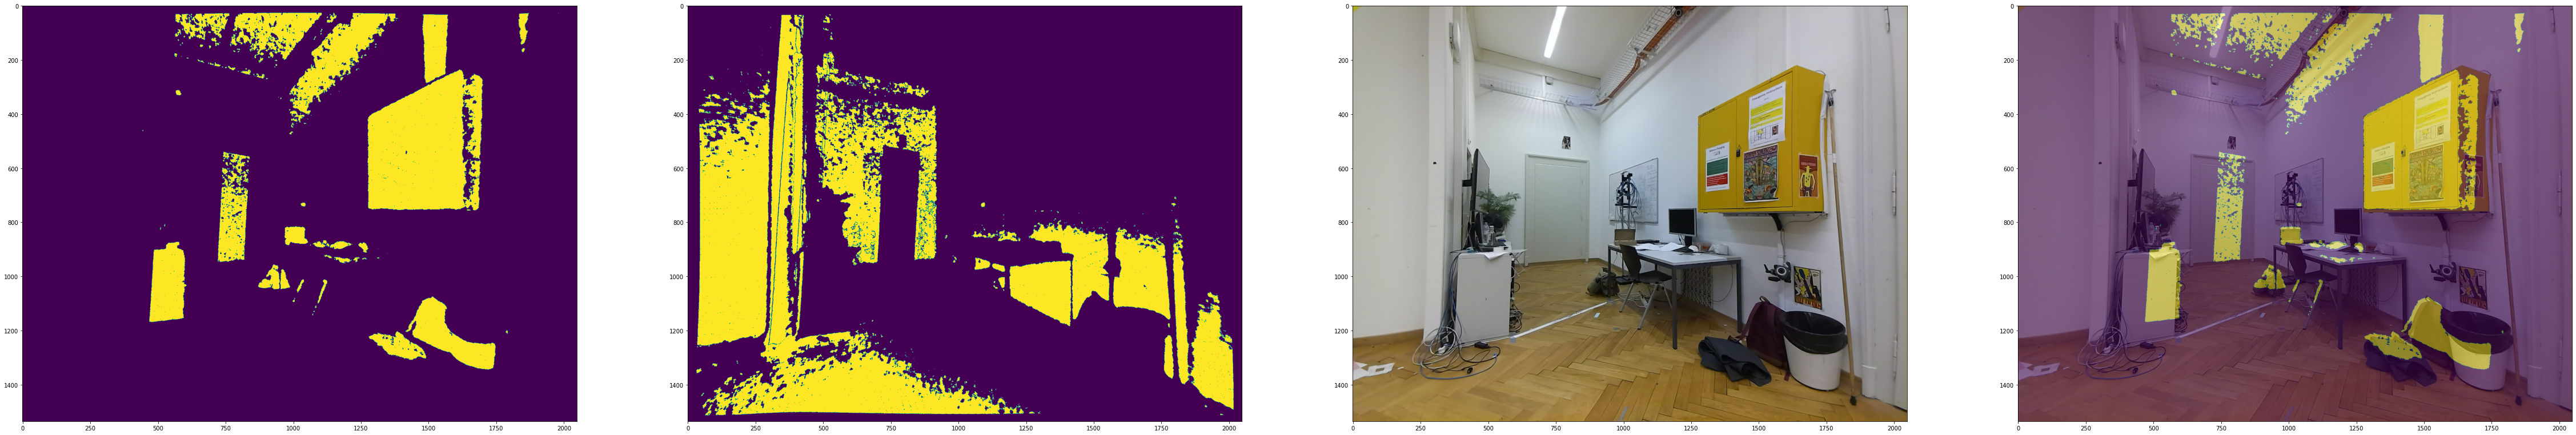

In [5]:
img = np.asarray(Image.open(working_dir + "/"+ files_labels[i]))
plt.subplot(1,4,1)
plt.imshow(np.flipud(np.fliplr(img)) > 100)
plt.subplot(1,4,2)
flp = np.flipud(np.fliplr(img))
plt.imshow(np.logical_and(flp < 40, flp > 0))

img = np.asarray(Image.open(working_dir + "/"+ files_original[i]))
plt.subplot(1,4,3)
plt.imshow(np.flipud(np.fliplr(img)))


plt.subplot(1,4,4)
plt.imshow(np.flipud(np.fliplr(img)))
img = np.asarray(Image.open(working_dir + "/"+ files_labels[i]))
plt.imshow(np.flipud(np.fliplr(img)) > 100, alpha = 0.5)